## Import Packages

In [1]:
import pandas as pd

In [2]:
from scipy.stats import chi2_contingency as chi2

## Chi Square Test

### Load Dataset

In [7]:
df=pd.read_csv('blood_seroprevalence.csv')
df.sample(10)

,Indicator,Geographic Area,Geographic Identifier,Race,Sex,Age,Time Period,n (Unweighted),Estimate % (weighted),2.5%,97.5%
4980,Combined seroprevalence,Indiana,18,Overall,Male,Overall,2022 Quarter 2,610.0,94.24,85.44,97.85
11776,Combined seroprevalence,Midwest,2,Overall,Overall,16 to 29,2022 Quarter 4,643.0,98.50,96.41,99.38
8181,Neither past infection nor vaccination,Oklahoma,40,Overall,Overall,Overall,2022 Quarter 3,7.0,4.21,1.39,12.04
10556,Presumed vaccination without infection,Idaho,16,Non-Hispanic White,Overall,Overall,2022 Quarter 3,280.0,22.23,18.58,26.35
15188,Combined seroprevalence,Wyoming,56,Non-Hispanic Asian,Overall,Overall,2022 Quarter 4,2.0,100.00,34.24,100.00
2502,Overall,Montana,30,Non-Hispanic Asian,Overall,Overall,2022 Quarter 1,8.0,100.00,NaN,NaN
13319,Neither past infection nor vaccination,North Carolina,37,Overall,Overall,65 and over,2022 Quarter 4,22.0,2.50,1.68,3.70
4487,Overall,District of Columbia,11,Overall,Male,Overall,2022 Quarter 2,31.0,100.00,NaN,NaN
7280,Indeterminate,Mississippi,28,Other,Overall,Overall,2022 Quarter 2,0.0,0.00,NaN,NaN
6482,Past infection with or without vaccination,Florida,12,Non-Hispanic Asian,Overall,Overall,2022 Quarter 2,0.0,NaN,NaN,NaN


In [8]:
df.columns

Index(['Indicator', 'Geographic Area', 'Geographic Identifier', 'Race', 'Sex',
       'Age', 'Time Period', 'n (Unweighted)', 'Estimate % (weighted)', '2.5%',
       '97.5%'],
      dtype='object')

## Hypothesis

### Null Hypothesis

There is no relationship between age and COVID-19 seroprevalance ('Indicator') also known antibody development.

### Hypothesis

There is a relationship between age and COVID-19 seroprevalance ('Indicator') also known as antibody development.

In [17]:
df['Age'].value_counts()

Overall        10128
16 to 29        1266
30 to 49        1266
50 to 64        1266
65 and over     1266
Name: Age, dtype: int64

In [18]:
df['Indicator'].value_counts()

Overall                                       2532
Past infection with or without vaccination    2532
Presumed vaccination without infection        2532
Neither past infection nor vaccination        2532
Indeterminate                                 2532
Combined seroprevalence                       2532
Name: Indicator, dtype: int64

In [20]:
contingency_table=pd.crosstab (df['Age'],df['Indicator'])
print(contingency_table)

Indicator    Combined seroprevalence  Indeterminate  \
Age                                                   
16 to 29                         211            211   
30 to 49                         211            211   
50 to 64                         211            211   
65 and over                      211            211   
Overall                         1688           1688   

Indicator    Neither past infection nor vaccination  Overall  \
Age                                                            
16 to 29                                        211      211   
30 to 49                                        211      211   
50 to 64                                        211      211   
65 and over                                     211      211   
Overall                                        1688     1688   

Indicator    Past infection with or without vaccination  \
Age                                                       
16 to 29                                       

In [22]:
chi2, p, _, _ = chi2(contingency_table)
print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")

Chi2 value: 0.0
P-value: 1.0


##Interpretation

The P-value is greater than 0.05, therefore is not significant and supports the null hypothesis that there is no relationship between the two variables COVID-19 seroprevalance ('Indicator') abd 'Age'.

The Chi2 value of 0.0 indicates that the null hypothesis is true and there is no relationship between 'Age' and COVID-19 seroprevalance ('Indicator').

##T-Test Number 1

In [2]:
from scipy.stats import ttest_ind

In [80]:
df2 = pd.read_csv('cryptosporidiosis.csv')
df2.sample(10)

,Year,Race/Ethnicity,Citywide number (rate),Manhattan number (rate),Bronx number (rate),Brooklyn number (rate),Queens number (rate),Staten Island number (rate)
142,2019,"American Indian, non-Hispanic",0,0,0,0,0,0
157,2021,"Black, non-Hispanic",48 (2.7),12 (6.0),23 (5.6),10 (1.3),2 (0.5),1 (2.2)
14,2002,Total,148 (1.8),71 (4.6),27 (2.0),34 (1.4),14 (0.6),2 (0.5)
119,2017,Hispanic,43 (1.7),14 (3.3),14 (1.7),4 (0.8),10 (1.5),1 (1.1)
63,2010,Total,107 (1.3),43 (2.6),25 (1.8),28 (1.1),10 (0.4),1 (0.2)
130,2018,"Black, non-Hispanic",24 (1.3),6 (2.9),7 (1.6),9 (1.1),1 (0.2),1 (2.2)
96,2014,"Pacific Islander, Native Hawaiian, non-Hispanic",0,0,0,0,0,0
64,2011,Hispanic,26 (1.1),5 (1.2),12 (1.6),6 (1.2),3 (0.5),0
113,2016,"Asian, non-Hispanic",15 (1.2),3 (1.5),2 (3.4),5 (1.6),4 (0.7),1 (2.5)
24,2004,Total,138 (1.7),52 (3.4),34 (2.6),33 (1.3),16 (0.7),3 (0.7)


In [81]:
df2.columns

Index(['Year', 'Race/Ethnicity', 'Citywide        number (rate)',
       'Manhattan                   number (rate)',
       'Bronx                   number (rate)',
       'Brooklyn            number (rate)',
       'Queens               number (rate)',
       'Staten Island                  number  (rate)'],
      dtype='object')

## Hypothesis

There is a difference between the average number of residents with Cryptosporidiosis in Manhattan and Brooklyn

## Null Hypothesis

There is no difference between the average number of residents with Cryptosporidiosis in Manhattan and Brooklyn

In [82]:
df2['Race/Ethnicity'].value_counts()

Hispanic                                                                     22
White, non-Hispanic                                                          22
Black, non-Hispanic                                                          22
Total                                                                        22
Unknown                                                                      17
Two or more races, non-Hispanic                                              13
Asian, non-Hispanic                                                          11
American Indian, non-Hispanic                                                11
Pacific Islander, Native Hawaiian, non-Hispanic                               9
Asian, Pacific Islander, American Indian,    Alaska Native, non-Hispanic      7
Other, non-Hispanic                                                           3
Asian, Pacific Islander, American Indian,     Alaska Native, non-Hispanic     3
Pacific Islander, Native Hawaiian,  non-

In [86]:
df2['Manhattan                   number (rate)'].value_counts()

0            31
3             4
15 (3.6)      4
12 (5.1)      4
3 (1.5)       3
             ..
6 (2.7)       1
14 (1.7)      1
8 (2.0)       1
46 (2.9)      1
123 (7.6)     1
Name: Manhattan                   number (rate), Length: 112, dtype: int64

In [102]:
manhattan_rate=df2['Manhattan                   number (rate)'].apply(lambda x: x.split(" ")[0] if " " in x else x)
manhattan_rate

0       20
1       40
2       21
3        3
4       84
      ... 
159      0
160      0
161      3
162     12
163    123
Name: Manhattan                   number (rate), Length: 164, dtype: object

In [103]:
manhattan_rate = pd.to_numeric(manhattan_rate)

In [104]:
df2['Brooklyn            number (rate)'].value_counts()

0           39
1            7
3 (0.6)      5
7 (0.8)      5
6 (1.2)      4
            ..
6 (0.8)      1
20 (0.8)     1
9 (1.0)      1
4            1
50 (2.0)     1
Name: Brooklyn            number (rate), Length: 84, dtype: int64

In [105]:
brooklyn_rate=df2['Brooklyn            number (rate)'].apply(lambda x: x.split(" ")[0] if " " in x else x)
brooklyn_rate

0       8
1      11
2      14
3       2
4      35
       ..
159     0
160     0
161     1
162     7
163    50
Name: Brooklyn            number (rate), Length: 164, dtype: object

In [106]:
brooklyn_rate = pd.to_numeric(brooklyn_rate)

In [107]:
t_stat, p_value = ttest_ind(manhattan_rate, brooklyn_rate)

In [108]:
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 3.2587513953716574
P-value: 1.0


## Interpretation

1. The high T-statitic suggests there is a difference between the residents suffering cryptosporidiosis from in brooklyn and manhattan.  
2. The P-value is greather than 0.05, therefore it is not statistically significant and the null hypothesis is supported.

## T-Test Number 2

In [113]:
from scipy.stats import ttest_ind
import numpy as np
from scipy import stats

In [114]:
df3 = pd.read_csv('nyc_deaths.csv')
df3.sample(10)

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
1129,2018,"Accidents Except Drug Poisoning (V01-X39, X43,...",M,Non-Hispanic Black,129,15.392,15.436
627,2014,"Intentional Self-Harm (Suicide: X60-X84, Y87.0)",F,Other Race/ Ethnicity,5,.,.
115,2007,Aortic Aneurysm and Dissection (I71),F,Not Stated/Unknown,.,.,.
1421,2015,Essential Hypertension and Renal Diseases (I10...,Female,Non-Hispanic White,226,15.990015438,8.5882947134
52,2009,Certain Conditions originating in the Perinata...,M,Other Race/ Ethnicity,.,.,.
1115,2018,Influenza (Flu) and Pneumonia (J09-J18),F,Asian and Pacific Islander,79,12.163,10.757
1594,2016,"Nephritis, Nephrotic Syndrome and Nephrisis (N...",Female,Other Race/ Ethnicity,1,NaN,NaN
194,2012,Chronic Lower Respiratory Diseases (J40-J47),M,White Non-Hispanic,352,26.3,21.8
656,2012,Chronic Lower Respiratory Diseases (J40-J47),F,Black Non-Hispanic,204,19.5,16.9
1694,2017,Chronic Lower Respiratory Diseases (J40-J47),Female,Non-Hispanic Black,251,24.108629064,18.593854366


In [115]:
df3.columns

Index(['Year', 'Leading Cause', 'Sex', 'Race Ethnicity', 'Deaths',
       'Death Rate', 'Age Adjusted Death Rate'],
      dtype='object')

In [116]:
df3['Sex'].value_counts()

F         622
M         609
Female    288
Male      284
Name: Sex, dtype: int64

In [117]:
df3['Deaths'].value_counts()

.       138
1        61
5        32
6        29
8        28
       ... 
1536      1
531       1
2243      1
1082      1
2167      1
Name: Deaths, Length: 633, dtype: int64

### Hypothesis

There is a difference between the number of female deaths and male deaths in NYC.  

### Null Hypothesis

There is no difference between the number of  female deaths and male deaths in NYC.


In [10]:
df3.dropna(subset=['Sex','Deaths'],inplace=True)
df3

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2011,Chronic Lower Respiratory Diseases (J40-J47),M,White Non-Hispanic,444,33.3,27.8
1,2008,Malignant Neoplasms (Cancer: C00-C97),M,White Non-Hispanic,3361,250.4,214.3
2,2010,"Chronic Liver Disease and Cirrhosis (K70, K73)",M,Hispanic,150,13.1,17.6
3,2014,Malignant Neoplasms (Cancer: C00-C97),M,Hispanic,1146,96,143.5
4,2014,Certain Conditions originating in the Perinata...,M,Not Stated/Unknown,25,.,.
...,...,...,...,...,...,...,...
1798,2017,"Chronic Liver Disease and Cirrhosis (K70, K73-...",Male,Other Race/ Ethnicity,2,NaN,NaN
1799,2017,Aortic Aneurysm and Dissection (I71),Male,Other Race/ Ethnicity,2,NaN,NaN
1800,2017,Alzheimer's Disease (G30),Male,Other Race/ Ethnicity,2,NaN,NaN
1801,2017,Septicemia (A40-A41),Male,Other Race/ Ethnicity,2,NaN,NaN


In [11]:
df3['sex_female'] = df3['Sex'].apply(lambda x: 'sex_female' if x in ['F',
        'Female'] else 'sex_male')


In [29]:
sex_female_dataset = df3[df3['sex_female'] == 'sex_female']['Deaths']
dff=sex_female_dataset
sex_female_dataset

5        80
6        42
11      245
12      102
14       27
       ... 
1732      1
1733      1
1734      1
1735      1
1736      9
Name: Deaths, Length: 910, dtype: object

In [34]:
sex_female_dataset = [int(value) if value.replace('.', '').isdigit() else 0 for value in sex_female_dataset]

In [35]:
pd.to_numeric(sex_female_dataset)

array([  80,   42,  245,  102,   27,    0,   11,  136,  227,   60,  162,
          0, 2194,  344,    0,   14,  281, 1348,    0,  416,   71,  219,
         70,   78,    0,   10,    0,   18, 2282,   56,    5,  156,    0,
        216,  177,   88,    5,   83,   51, 2140,    0,    6,    0,  390,
         57,   10,    0,    0,   39,    0,    5,  507,   79, 1852,   18,
        271,  106,   11,    7,   49,   22,  208,  258,  209,    0,    0,
          0,    0,   51,   39,   24, 1473,   86,   14,  154, 1800,   89,
         10,    5,   60,   12, 3366,  206,    0,   70,    6,    0,    0,
        409,   51,    9,  231,  521,  209,    5,  295, 6297,    6,   59,
         11, 1326,   11,    6,   89,    0,  621,  169,  109,  107,  266,
        418,   57,    7,    0,   65, 2722,  238,    0,    0,  199,    0,
        218,   13, 4535,    0,    5,    0,   27,   43,  123,  510,    9,
        116,    0,  207,   35,    8,  214,   43,   56,  196,   29,   16,
        285,  278,  158,  155, 1784,  402,  215, 27

In [37]:
sex_male_dataset = df3[df3['sex_female'] == 'sex_male']['Deaths']
sex_male_dataset

0        444
1       3361
2        150
3       1146
4         25
        ... 
1798       2
1799       2
1800       2
1801       2
1802      16
Name: Deaths, Length: 893, dtype: object

In [39]:
sex_male_dataset = [int(value) if value.replace('.', '').isdigit() else 0 for value in sex_male_dataset]

In [40]:
pd.to_numeric(sex_male_dataset)

array([ 444, 3361,  150, 1146,   25,  159,  142,  149,    6,  169,   74,
        129,   42,   92,  137,  227,  299,    6,    0,  205,    6,   60,
        138,  266,  146,    6,    7,  200,   21,    0,   11, 3408,  377,
         72,    5,  187,    8,  204, 2316,  197, 2077,   27,  172,  204,
         94,  546,  290,  235,   30, 3142,    0,   18,  132,  149,    8,
        308, 1163,  187,   37,   39,  164, 1180,   55,  526,  213,    7,
          5,   38,  186,    0,  201,  502,  646,    6,   95,    0,  176,
        469,  115,  186,  218, 2034,  180, 2165, 1207,  347, 4495, 4085,
         17, 2275,   14,    5,    0,  352,  186,  478,   12, 1940, 1958,
         86,   43,  148,  276,    0,  107,  618,  200,  194,  265, 2068,
        528,  111,    0,  395,   76,   42,   51,  202, 1464,  206,  235,
          5,   10,  148,    8,  633,  195,  119,   10,   27,  207,  220,
         34,    5,   10,  170,   13,  189,    7,  167,   55,   15,  258,
        340,   16,    9,    0,  272,   73,  657,  1

In [51]:
t_stat, p_val = stats.ttest_ind(sex_female_dataset, sex_male_dataset, equal_var=False)

In [52]:
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 0.0
P-value: 1.0


## Interpretation

1. Given the T-statstic of 0.0 it can be concluded that the null hypothesis is true.

2. Given the P-value is greater than 0.05, it is not statistically significant and supports the null hypothesis. Though the null hypothesis is not rejected, it does not mean that the hypothesis is true.

In conclusion the null hypothesis was proven to be true based off of the calculated T-statistic and P-value.  

## Regression Analysis

In [2]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
df5 = pd.read_csv('heart_risk.csv')
df5

,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL,Risk
0,1,1,0,1,1,49,101,181,32,11.1
1,0,0,0,1,1,69,167,155,59,30.1
2,0,1,1,1,1,50,181,147,59,37.6
3,1,1,1,1,0,42,145,166,46,13.2
4,0,0,1,0,1,66,134,199,63,15.1
...,...,...,...,...,...,...,...,...,...,...
995,1,0,1,1,1,42,110,175,67,3.9
996,0,1,0,1,0,75,123,130,56,23.9
997,1,1,1,0,1,76,178,179,30,61.3
998,0,1,1,1,0,65,139,169,66,32.3


### Cleaning and Understanding Dataset

In [4]:
import re
def cleaning_columns (df5):
    def clean_name(name):
        cleaned_name = re.sub(r'[^a-zA-Z0-9]', '', name)
        return cleaned_name.lower()

    df5.columns = [clean_name(col) for col in df5.columns]
    return df5

df5 = cleaning_columns(df5)
df5

,ismale,isblack,issmoker,isdiabetic,ishypertensive,age,systolic,cholesterol,hdl,risk
0,1,1,0,1,1,49,101,181,32,11.1
1,0,0,0,1,1,69,167,155,59,30.1
2,0,1,1,1,1,50,181,147,59,37.6
3,1,1,1,1,0,42,145,166,46,13.2
4,0,0,1,0,1,66,134,199,63,15.1
...,...,...,...,...,...,...,...,...,...,...
995,1,0,1,1,1,42,110,175,67,3.9
996,0,1,0,1,0,75,123,130,56,23.9
997,1,1,1,0,1,76,178,179,30,61.3
998,0,1,1,1,0,65,139,169,66,32.3


In [8]:
df5 = df5.dropna()
df5.sample(10)

,ismale,isblack,issmoker,isdiabetic,ishypertensive,age,systolic,cholesterol,hdl,risk
559,1,1,0,0,1,69,192,142,92,28.1
558,0,1,1,0,1,74,169,194,75,41.0
292,0,1,1,0,1,47,200,190,38,52.1
691,1,0,1,0,0,69,161,143,58,23.6
88,0,1,1,0,0,51,136,168,86,2.5
120,1,1,1,0,0,70,94,187,69,10.4
645,1,1,0,0,1,54,100,161,20,8.2
665,1,1,1,0,1,62,102,151,71,13.4
795,0,0,0,1,0,42,100,144,86,0.2
765,0,0,1,1,1,77,115,181,83,49.3


In [6]:
 df5.columns

Index(['ismale', 'isblack', 'issmoker', 'isdiabetic', 'ishypertensive', 'age',
       'systolic', 'cholesterol', 'hdl', 'risk'],
      dtype='object')

### Variables

Dependent Variable: 'risk' (risk of Heart Attack) --> y

Independent Variable: 'hdl' --> X

In [9]:
X = df5['hdl']
y = df5['risk']

In [10]:
X = sm.add_constant(X)

In [17]:
model = sm.OLS(y, X).fit()

In [18]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   risk   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     13.56
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           0.000244
Time:                        03:48:35   Log-Likelihood:                -4247.5
No. Observations:                1000   AIC:                             8499.
Df Residuals:                     998   BIC:                             8509.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.5949      1.442     17.060      0.0

In [14]:
slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(X, y)

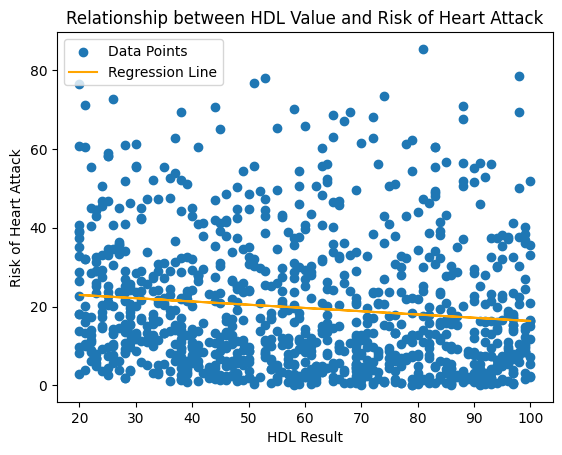

In [19]:
plt.scatter(df5['hdl'], df5['risk'], label='Data Points')
plt.plot(df5['hdl'], model.predict(X), color='orange', label='Regression Line')
plt.xlabel('HDL Result')
plt.ylabel('Risk of Heart Attack')
plt.title('Relationship between HDL Value and Risk of Heart Attack')
plt.legend()
plt.show()

In [25]:
print(f"Slope (Coefficient for Heart Attack Risk): {slope:.3f}")
print(f"R-squared value: {r_squared:.3f}")

Slope (Coefficient for Heart Attack Risk): 0.000
R-squared value: 0.013


## Analysis Interpretation

1. **Significance**

  Looking at the Coefficient for Heart Attack Risk also known as the slope we can determine the significance of the regression. In the case of this regression though it looks like the line of regression is slighty heading downwards the calculated slope is 0.0. The slope of 0.0 tells us that there is no relationship between the hdl and risk of heart attack. This conclusion makes sense; if we take a look at the plot we can see that the data points are not dispersed in any given pattern.


2. **Direction**

  After plotting my X and y variables I was able to determine that the two variables of hdl and risk for heart attack have a negative correlation based off of the line of fit which is slightly going down. However the hdl and risk for heart attack data points are very scattered with a lack direction.

3. **Strength of Relationship**

  The strength of the relationship between hdl and the risk of heart failure can be determined by the coefficient of determination (r2 value) value. With the r2-value of 0.013, it can be determined that that only 1.3% of the variation is explained in the model. In other words there is a weak relationship between the two variables plotted.

